# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

In [2]:

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# 2. Load Dataset

In [4]:

df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(df.shape)

(614, 13)


# 3.  Data Exploration

### 3.1. total Loan ID's Column

In [6]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64

### 3.2. Analyze Each Categorical Columns

In [7]:
def analyze_categorical(data, column):
    counts = data[column].value_counts(dropna=False)
    print(f"\n--- {column} ---")
    print(counts)
    sns.countplot(x=column, data=data, palette="hls")
    plt.show()
    
    for category, count in counts.items():
        percentage = (count / len(data)) * 100
        print(f"Percentage of {category}: {percentage:.2f}%")
    
    null_percentage = data[column].isnull().mean() * 100
    print(f"Missing values percentage: {null_percentage:.2f}%\n")

In [8]:
categorical_columns = [
    'Gender', 'Married', 'Education', 'Self_Employed',
    'Credit_History', 'Property_Area', 'Loan_Status', 'Loan_Amount_Term'
]


--- Gender ---
Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2277182311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="hls")


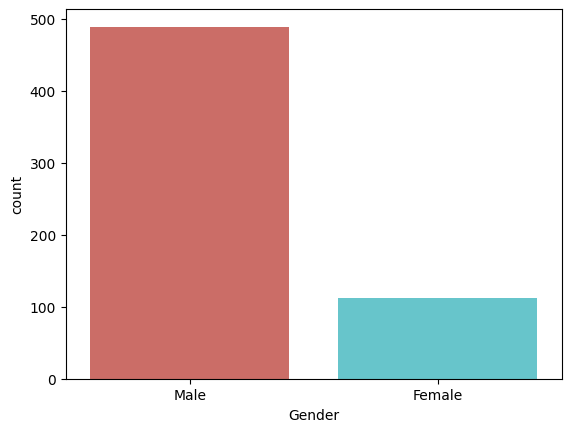

Percentage of Male: 79.64%
Percentage of Female: 18.24%
Percentage of nan: 2.12%
Missing values percentage: 2.12%


--- Married ---
Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2277182311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="hls")


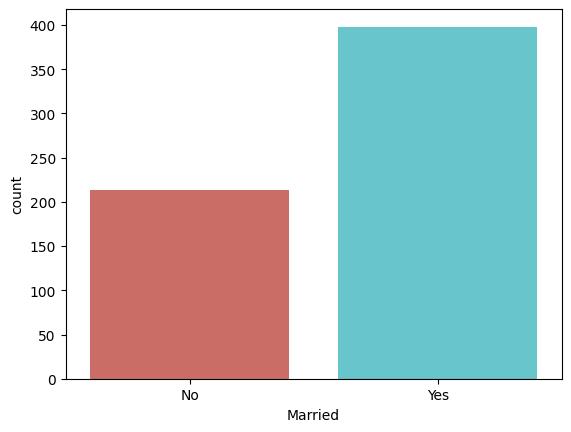

Percentage of Yes: 64.82%
Percentage of No: 34.69%
Percentage of nan: 0.49%
Missing values percentage: 0.49%


--- Education ---
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2277182311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="hls")


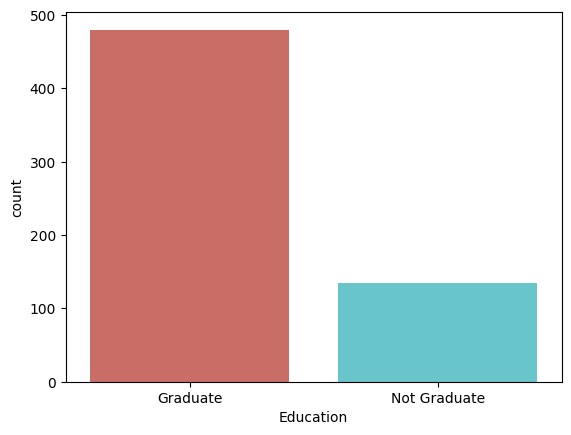

Percentage of Graduate: 78.18%
Percentage of Not Graduate: 21.82%
Missing values percentage: 0.00%


--- Self_Employed ---
Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2277182311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="hls")


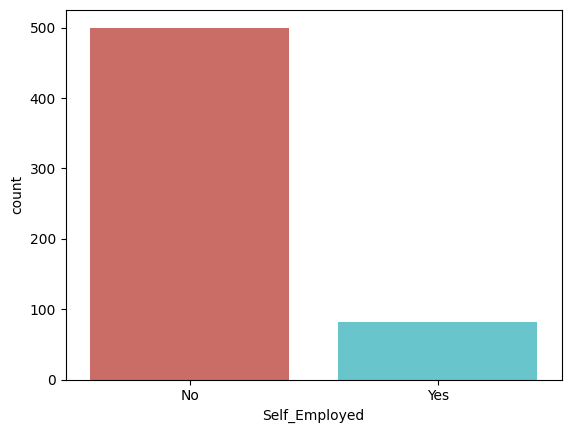

Percentage of No: 81.43%
Percentage of Yes: 13.36%
Percentage of nan: 5.21%
Missing values percentage: 5.21%


--- Credit_History ---
Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2277182311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="hls")


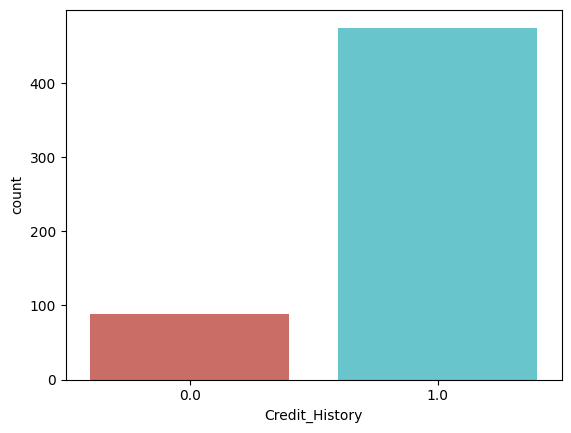

Percentage of 1.0: 77.36%
Percentage of 0.0: 14.50%
Percentage of nan: 8.14%
Missing values percentage: 8.14%


--- Property_Area ---
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2277182311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="hls")


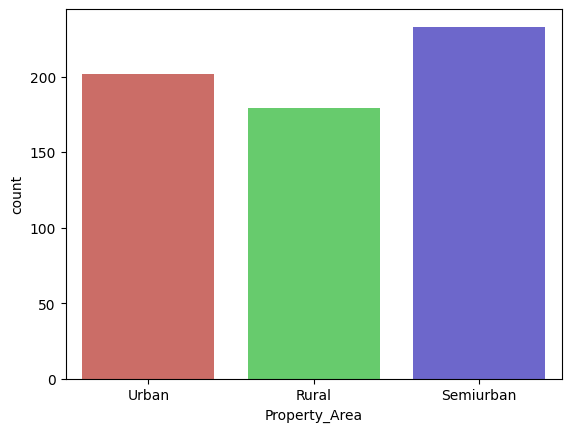

Percentage of Semiurban: 37.95%
Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Missing values percentage: 0.00%


--- Loan_Status ---
Loan_Status
Y    422
N    192
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2277182311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="hls")


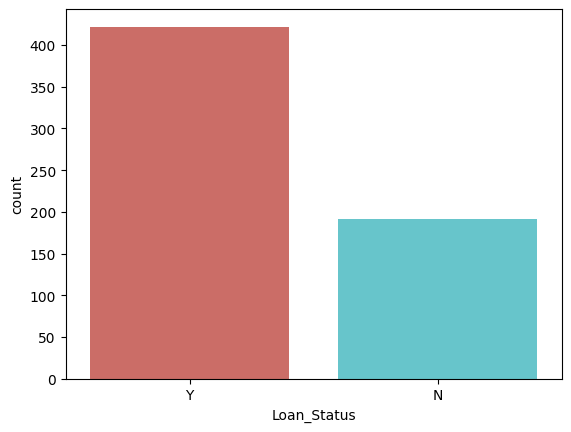

Percentage of Y: 68.73%
Percentage of N: 31.27%
Missing values percentage: 0.00%


--- Loan_Amount_Term ---
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2277182311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="hls")


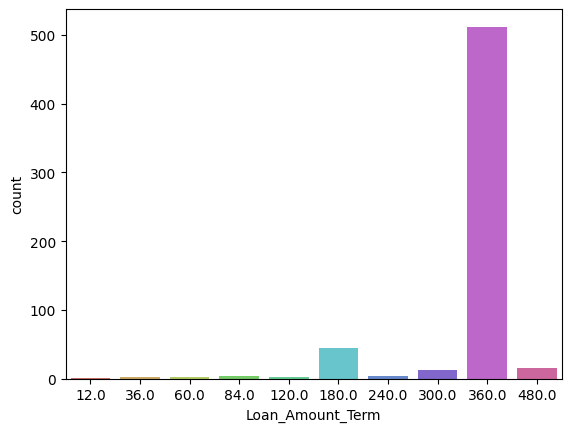

Percentage of 360.0: 83.39%
Percentage of 180.0: 7.17%
Percentage of 480.0: 2.44%
Percentage of nan: 2.28%
Percentage of 300.0: 2.12%
Percentage of 84.0: 0.65%
Percentage of 240.0: 0.65%
Percentage of 120.0: 0.49%
Percentage of 60.0: 0.33%
Percentage of 36.0: 0.33%
Percentage of 12.0: 0.16%
Missing values percentage: 2.28%



In [9]:
for col in categorical_columns:
    analyze_categorical(df, col)

# 4. Numerical Variable Analysis


### 4.1 Descriptive Statistics for Numerical Variables:

In [10]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000



### 4.1 Distribution of Numerical Variables:

 4.1.1 Histogram Distribution:

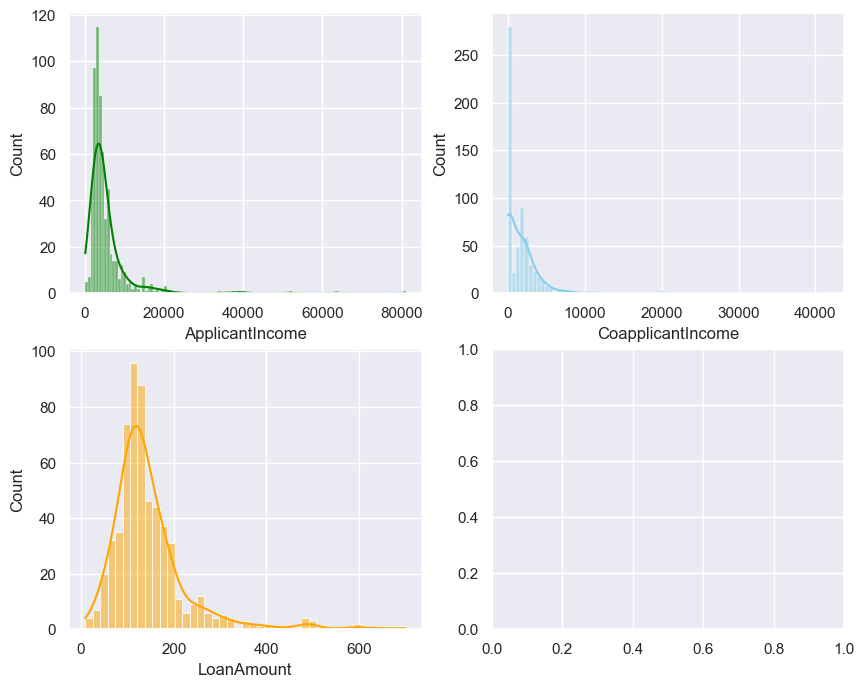

In [11]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

4.1.2 Violin Plot:

<Axes: ylabel='LoanAmount'>

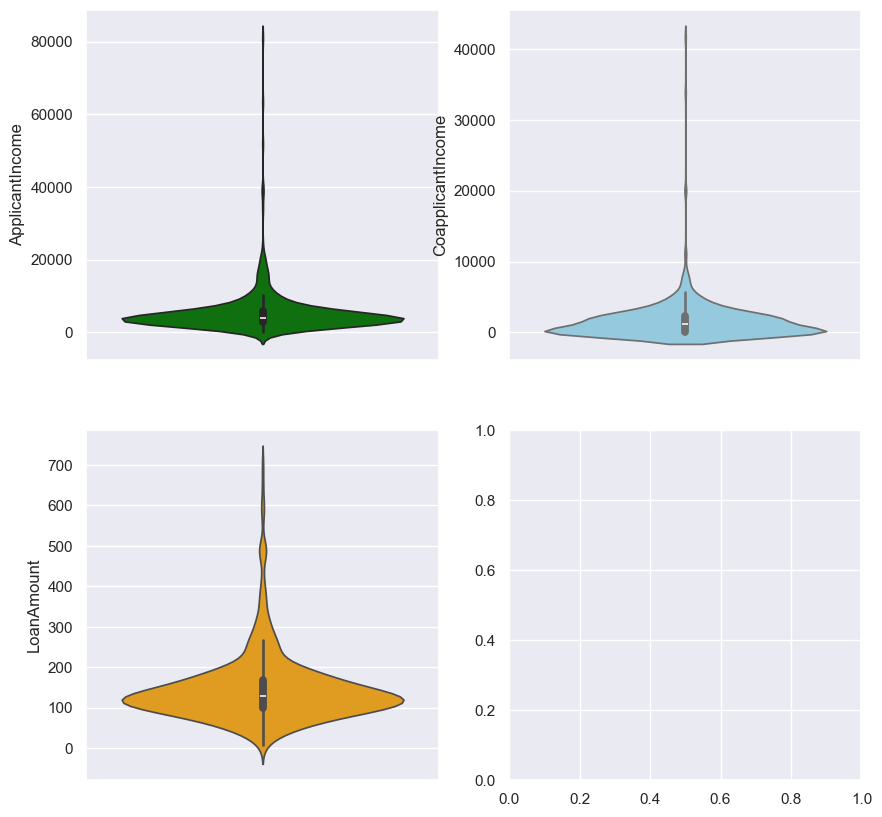

In [12]:
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))
sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange')


### 4.2  Other Explorations

#### 4.2.1 Correlation Heatmap:

In [13]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()


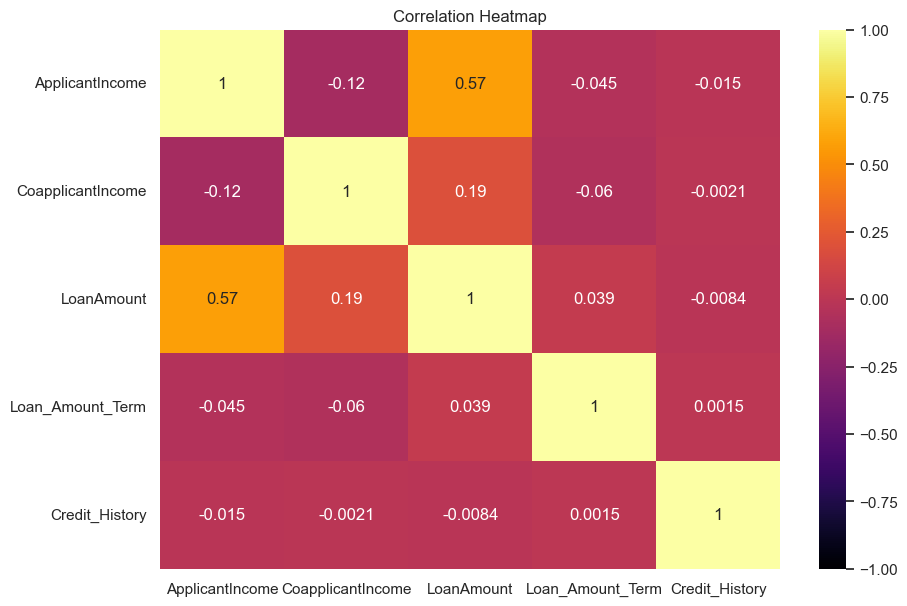

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

#### 4.2.2 Categorical vs Categorical Analysis:


Gender vs Married Status:

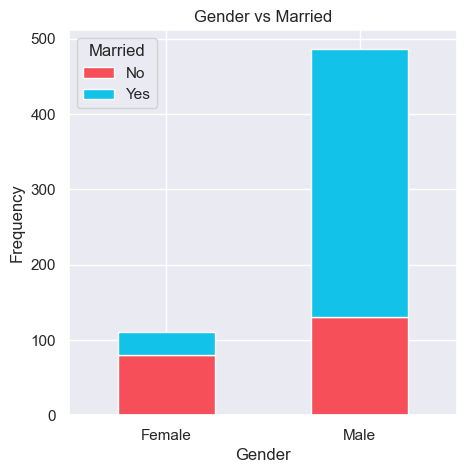

In [15]:
pd.crosstab(df.Gender, df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Self-Employed vs Credit History:

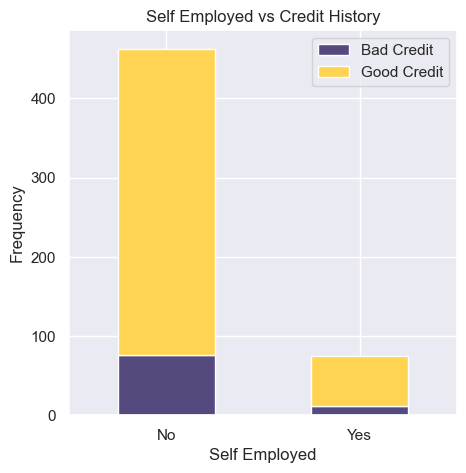

In [16]:
pd.crosstab(df.Self_Employed, df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Property Area vs Loan Status:

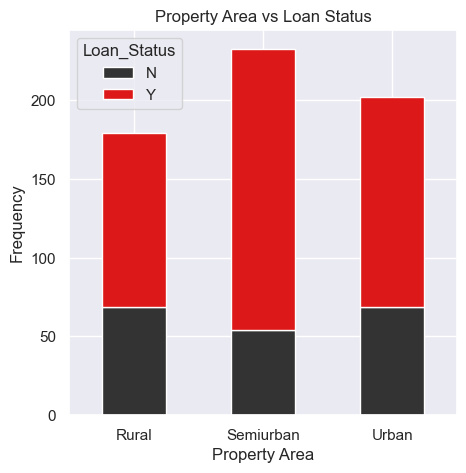

In [17]:
pd.crosstab(df.Property_Area, df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

#### 4.2.3 Categorical vs Numerical Analysis:

C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\1139030696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


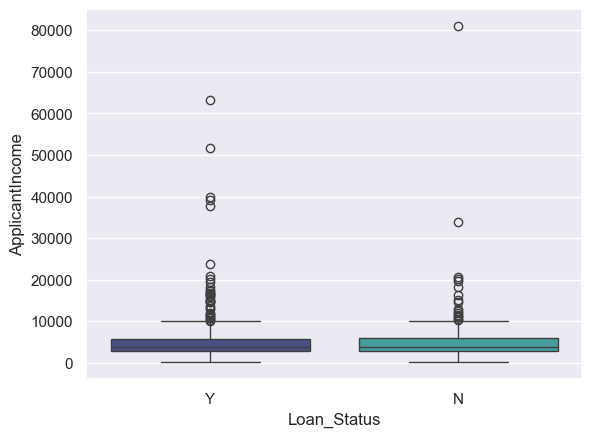

In [18]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\3243319138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");


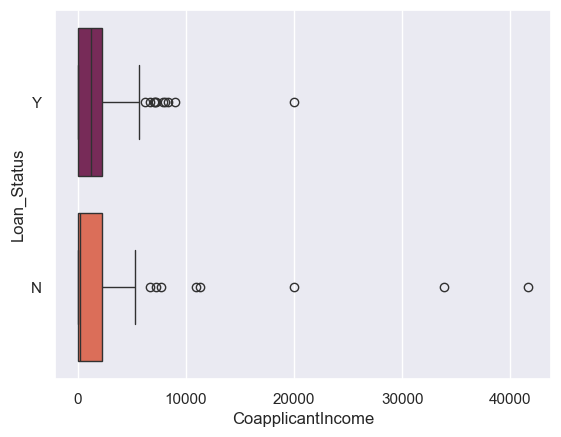

In [19]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\2807477037.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


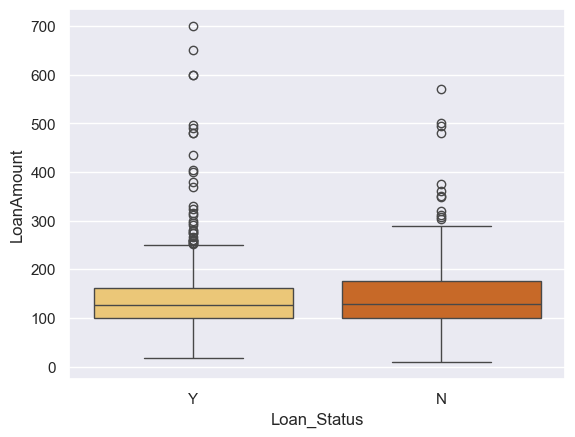

In [20]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

#### 4.2.4 Numerical vs Numerical Analysis:

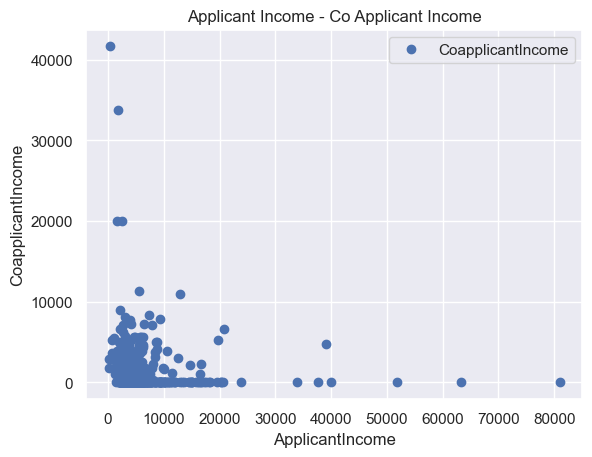

In [21]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()

In [22]:

print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=np.float64(13.835753259915665), pvalue=np.float64(1.460983948423972e-40), df=np.float64(1226.0))



#### 4.2.5 Handling Missing Values

Null Value Check and Visualization:

In [23]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

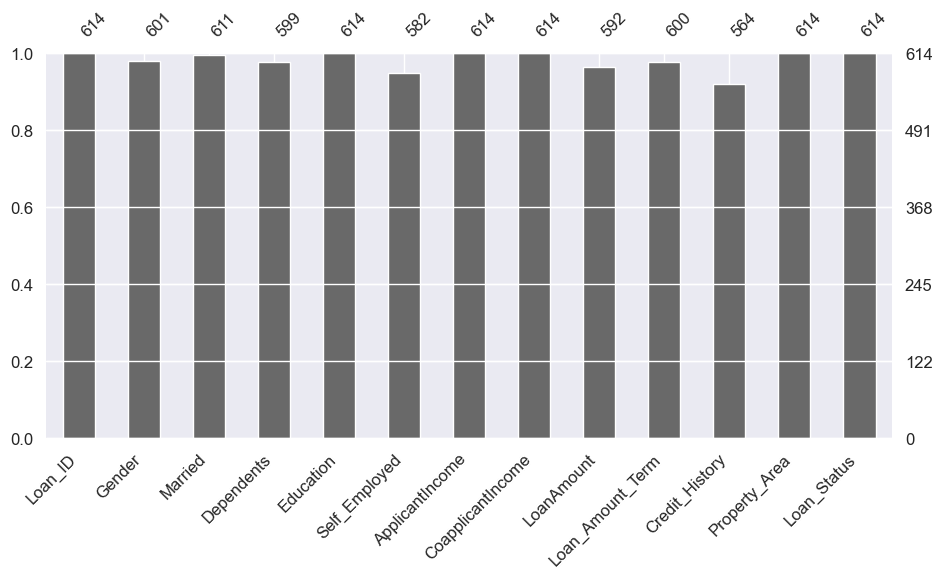

In [24]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

# 5. Data Preprocessing


### 5.1 Drop Unnecessary Variables:

In [25]:
df = df.drop(['Loan_ID'], axis=1)

In [26]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 5.2 Data Imputation for Missing Values:

Categorical Variables:

In [27]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\3023607144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\3023607144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Numerical Variables:

In [28]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\1977403596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [29]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### 5.3 One-Hot Encoding:

In [30]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

### 5.4 Outlier & Infinite Value Removal with Square Root Transformation:

In [31]:
# Select only numeric columns for IQR calculation
numeric_cols = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Remove outliers based on the IQR rule
df_no_outliers = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the DataFrame after removing outliers
print(df_no_outliers)


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
607             3987             1411.0  157.000000             360.0   
608             3232             1950.0  108.000000             360.0   
609             2900                0.0   71.000000             360.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   

     Credit_History  Gender  Married  Dependents_0  Dependents_1  \
0               1.0    True    False          True     

### 5.5 Skewed Distribution Treatment

In [32]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

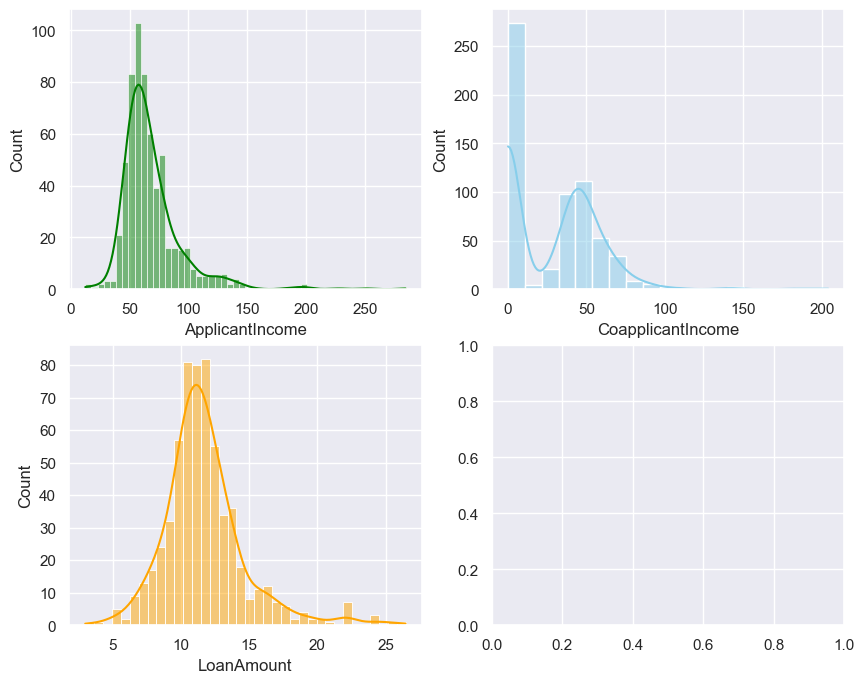

In [33]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

### 5.5 Feature Separation

Splitting Features (X) and Target Variable (y):

In [34]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

### 5.6 SMOTE Technique

Handling Class Imbalance:

In [35]:
X, y = SMOTE().fit_resample(X, y)

C:\Users\harsh\AppData\Local\Temp\ipykernel_15848\537720374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


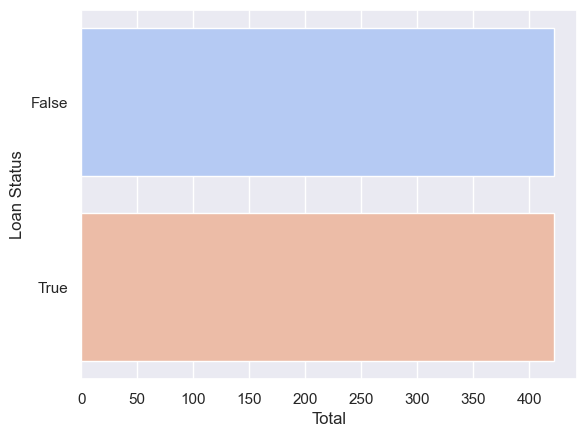

In [36]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

### 5.7 Data Normalization

Min-Max Scaling for Normalized Range (0, 1):

In [37]:
X = MinMaxScaler().fit_transform(X)

### 5.8 Splitting Data for Model Training

Train-Test Split:

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 6. Models

### 6.1 Logistic Regression


In [39]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred, y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

       False       0.97      0.67      0.79        86
        True       0.74      0.98      0.84        83

    accuracy                           0.82       169
   macro avg       0.85      0.83      0.82       169
weighted avg       0.86      0.82      0.82       169

[[58 28]
 [ 2 81]]
LR accuracy: 82.25%


### 6.2 K-Nearest Neighbors (KNN)


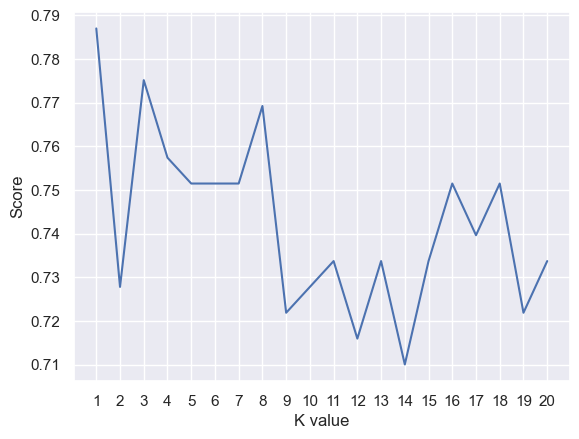

KNN best accuracy: 78.70%


In [40]:
scoreListknn = []
for i in range(1, 21):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1, 21), scoreListknn)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))


### 6.3 Support Vector Machine (SVM)


In [41]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVCAcc = accuracy_score(y_pred, y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))


              precision    recall  f1-score   support

       False       0.98      0.67      0.80        86
        True       0.75      0.99      0.85        83

    accuracy                           0.83       169
   macro avg       0.86      0.83      0.82       169
weighted avg       0.87      0.83      0.82       169

[[58 28]
 [ 1 82]]
SVC accuracy: 82.84%


c:\BATCOMPUTER'S Drive D\Python Lab\pyenv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### 6.4 Naive Bayes


6.4.1 Categorical Naive Bayes


In [42]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NBAcc1 = accuracy_score(y_pred, y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))


              precision    recall  f1-score   support

       False       0.92      0.57      0.71        86
        True       0.68      0.95      0.79        83

    accuracy                           0.76       169
   macro avg       0.80      0.76      0.75       169
weighted avg       0.80      0.76      0.75       169

[[49 37]
 [ 4 79]]
Categorical Naive Bayes accuracy: 75.74%


6.4.2 Gaussian Naive Bayes


In [43]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NBAcc2 = accuracy_score(y_pred, y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))


              precision    recall  f1-score   support

       False       0.86      0.58      0.69        86
        True       0.68      0.90      0.77        83

    accuracy                           0.74       169
   macro avg       0.77      0.74      0.73       169
weighted avg       0.77      0.74      0.73       169

[[50 36]
 [ 8 75]]
Gaussian Naive Bayes accuracy: 73.96%


### 6.5 Decision Tree


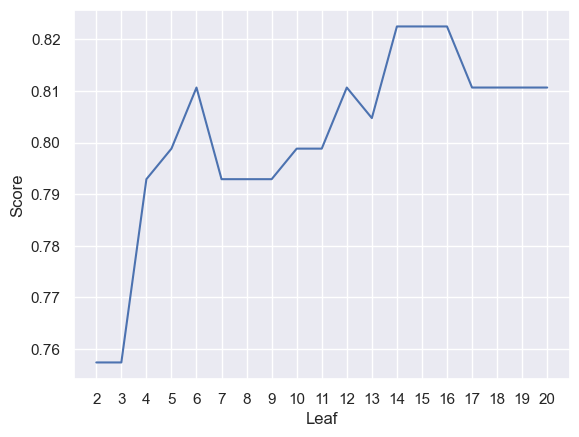

Decision Tree Accuracy: 82.25%


In [44]:
scoreListDT = []
for i in range(2, 21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2, 21), scoreListDT)
plt.xticks(np.arange(2, 21, 1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))


### 6.6 Random Forest


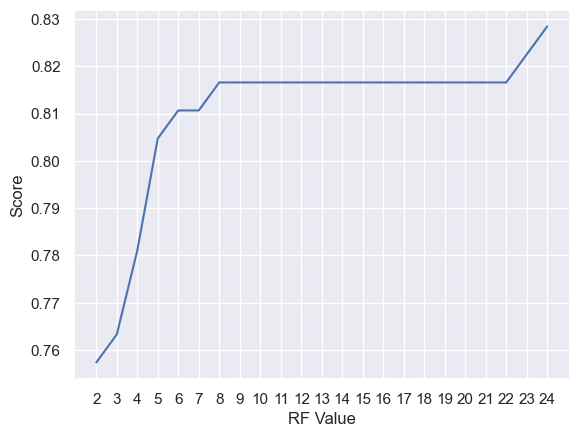

Random Forest Accuracy: 82.84%


In [45]:
scoreListRF = []
for i in range(2, 25):
    RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2, 25), scoreListRF)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy: {:.2f}%".format(RFAcc*100))


### 6.7 Gradient Boosting


In [46]:
paramsGB = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'subsample': [0.5, 1],
    'max_leaf_nodes': [2, 5, 10, 20, 30, 40, 50]
}

In [47]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [48]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=1, max_leaf_nodes=20, n_estimators=400,
                           subsample=1)
0.8430926916221033
{'subsample': 1, 'n_estimators': 400, 'max_leaf_nodes': 20, 'max_depth': 1}
8


In [49]:
GBclassifier = GradientBoostingClassifier(
    subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10
)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)





In [50]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       False       0.89      0.76      0.82        86
        True       0.78      0.90      0.84        83

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169



In [51]:
print(confusion_matrix(y_test, y_pred))

[[65 21]
 [ 8 75]]


In [52]:
GBAcc = accuracy_score(y_pred, y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

Gradient Boosting accuracy: 82.84%


# 7. Model Comparison


In [53]:
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'K Neighbors', 
              'SVM', 'Categorical NB', 
              'Gaussian NB', 'Decision Tree', 
              'Random Forest', 'Gradient Boost'], 
    'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                 NBAcc1*100, NBAcc2*100, DTAcc*100, 
                 RFAcc*100, GBAcc*100]
})

compare.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
2,SVM,82.840237
7,Gradient Boost,82.840237
6,Random Forest,82.840237
0,Logistic Regression,82.248521
5,Decision Tree,82.248521
1,K Neighbors,78.698225
3,Categorical NB,75.739645
4,Gaussian NB,73.964497
